# WELCOME TO UCHE'S 2ND PROJECT
- This is my second portfolio Project where i'll be working on training a Machine Learning model & then integrating it with a feature engineering tool for raw Data processing,which would allow for Binary classification of the Data by the trained model.
- The aim of the Project is to train an ML model that will predict wheither urls are harmful(Phishing urls) or the urls are safe & then to create a feature Engineering tool,that will take urls in string format & then extract the features of the urls as numerical vectors which would then be given to the trained model for classification.
- The Dataset to be used for training the model was gotten from Kaggle,(more details will be given about the data on the next cell).
- The Project will be divided into proceedures & substeps for easier comprehension.

# About the Data
The Data is titled 'phishing-data' & it was gotten from the Kaggle community free datasets(download link will be displayed in the code).It primarily contains over 95000 urls,which are either declared to be harmful or safe.The data also contain other values which represent the features for the eventual classification of the urls,the columns of the data are:
1. domain: The URL itself.
2. ranking: Page Ranking on Google fetched from a google page rank checker
3. isIp: Is there an IP address in the weblink
4. valid: This data is fetched from google's whois API that tells us more about the current status of the URL's registration.
5. activeDuration: Also from whois API. Gives the duration of the time in days since the registration up until now
6. urlLen: It is simply the length of the URL
7. is@: If the link has a '@' character then it's value = 1
8. isredirect: If the link has double slashes,there is a chance that it is a redirect. (will be equal to 1 if multiple slashes are present together).
9. haveDash: If there are any dashes in the domain name.
10. domainLen: The length of just the domain name.
11. noOfSubdomain: The number of subdomains preset in the URL.
12. Labels: 0 is Legitimate website , 1 is Phishing Link/ Spam Link

# Proceedure 1- Importing the Data, creating a dataframe & perfroming simple E.D.A.
The Data will be directly imported from kaggle & to do this, we would use the **"opendatasets"** module, which is used to download datsets from Kaggle & also Google Drive. Pandas will be used to input the values into a dataframe from which we would run simple Exploratory Data Analysis.

In [1]:
import opendatasets as od, pandas as pd

In [2]:
od.download('https://www.kaggle.com/datasets/aman9d/phishing-data')

In [3]:
data = pd.read_csv('phishing-data/combined_dataset.csv')
data

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0


**Performing the E.D.A**

In [4]:
data.shape

(95910, 12)

In [5]:
data.isnull().any()

domain            False
ranking           False
isIp              False
valid             False
activeDuration    False
urlLen            False
is@               False
isredirect        False
haveDash          False
domainLen         False
nosOfSubdomain    False
label             False
dtype: bool

In [6]:
data.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


# Proceedure 2- Exploratory Data Visualization
Since we're using the Data to train an ML model,it's important that we study the relationship of each feature with the labels & to understand which features have the strongest influence on a classification output,the fastest way to do this is by plotting each column against the label column,then we would be to easily & quickly analyse the feature-label relationships. To create the plots, we would use the **Seaborn**  Visualization library..

In [7]:
import seaborn as sns,matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='ranking', ylabel='label'>

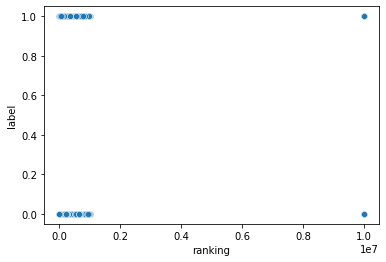

In [8]:
# scatterplot of the "ranking" column against the 'label"
sns.scatterplot(data=data, x='ranking',y='label')

<AxesSubplot:xlabel='isIp', ylabel='label'>

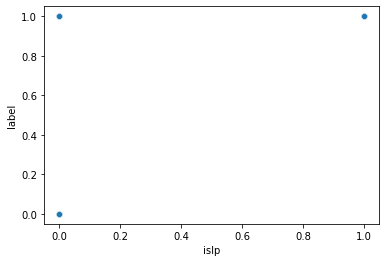

In [9]:
# scatterplot of the "isIp" column against the 'label"
sns.scatterplot(data=data, x='isIp',y='label')

<AxesSubplot:xlabel='valid', ylabel='label'>

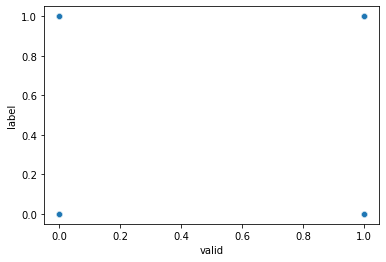

In [10]:
# scatterplot of the "valid" column against the 'label"
sns.scatterplot(data=data, x='valid',y='label')

<AxesSubplot:xlabel='activeDuration', ylabel='label'>

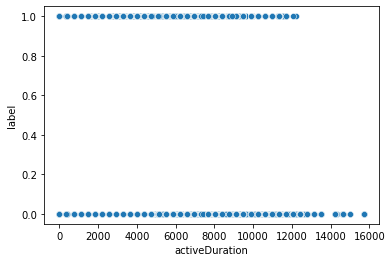

In [11]:
# scatterplot of the "activeDuration" column against the 'label"
sns.scatterplot(data=data, x='activeDuration',y='label')

<AxesSubplot:xlabel='urlLen', ylabel='label'>

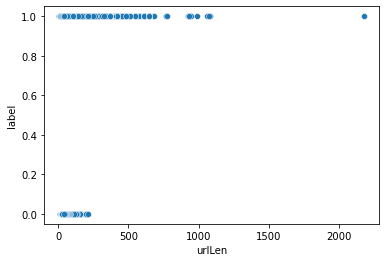

In [12]:
# scatterplot of the "urlLen" column against the 'label"
sns.scatterplot(data=data, x='urlLen',y='label')

<AxesSubplot:xlabel='is@', ylabel='label'>

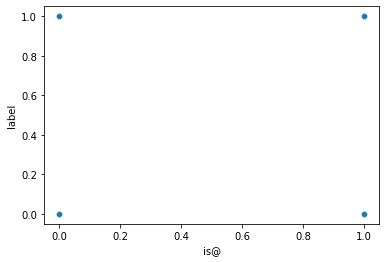

In [13]:
# scatterplot of the "is@" column against the 'label"
sns.scatterplot(data=data, x='is@',y='label')

<AxesSubplot:xlabel='isredirect', ylabel='label'>

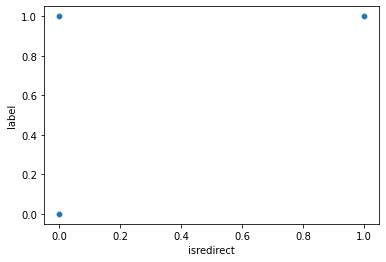

In [14]:
# scatterplot of the "isredirect" column against the 'label"
sns.scatterplot(data=data, x='isredirect',y='label')

<AxesSubplot:xlabel='haveDash', ylabel='label'>

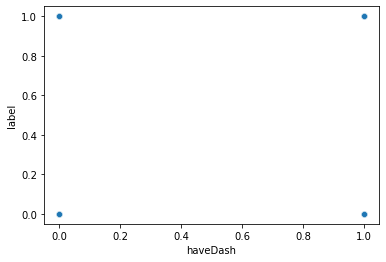

In [15]:
# scatterplot of the "heDash" column against the 'label"
sns.scatterplot(data=data, x='haveDash',y='label')

<AxesSubplot:xlabel='domainLen', ylabel='label'>

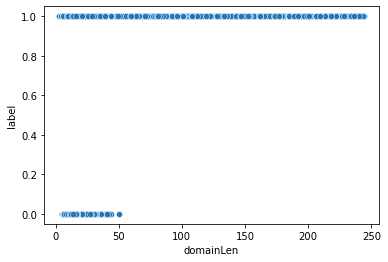

In [16]:
# scatterplot of the "domainLen" column against the 'label"
sns.scatterplot(data=data, x='domainLen',y='label')

<AxesSubplot:xlabel='nosOfSubdomain', ylabel='label'>

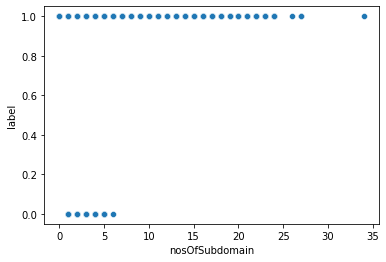

In [17]:
# scatterplot of the "nosOfSubdomain" column against the 'label"
sns.scatterplot(data=data, x='nosOfSubdomain',y='label')

**Some General vvisualisations**

<AxesSubplot:>

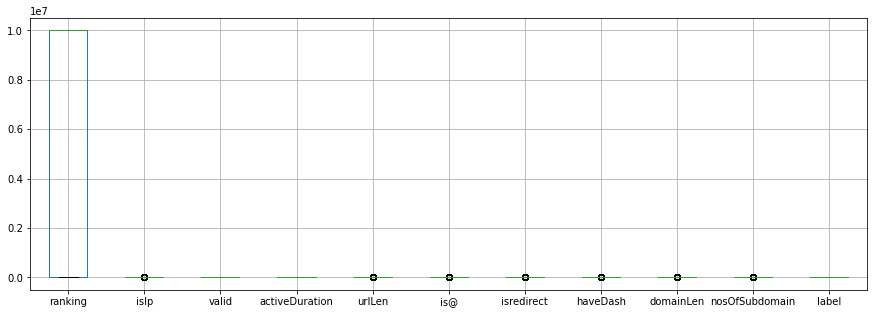

In [18]:
# boxplot representing all the features of the data
plt.figure(figsize=(15,5))
data.boxplot()

<AxesSubplot:xlabel='nosOfSubdomain', ylabel='domainLen'>

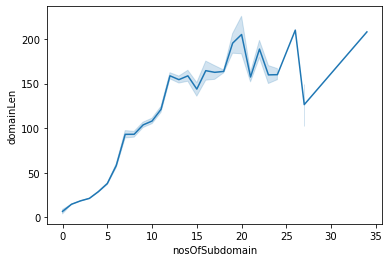

In [19]:
# line plot of "domainLen" column agaisnt the "nosOfSubdomain" column
sns.lineplot(data=data,y='domainLen',x='nosOfSubdomain')

<AxesSubplot:xlabel='domainLen', ylabel='urlLen'>

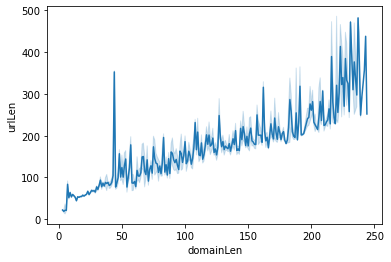

In [20]:
# line plot of "urlLen" column agaisnt the "domainLen" column
sns.lineplot(data=data,x='domainLen',y='urlLen')

# Proceedure 3- Spliting the data for train/test
To be able to give the data to Models,we would need to split it into the training & testing sets.

**Spliting the Data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data[data.columns[1:-1]].values
y = data[data.columns[-1]].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Proceedure 4- Finding the best Classification model to use for prediction.
Four different models are going to be trained & tested, they are:
- LogisticRegression Model
- Multinomial Bias Model
- Support Vector classifcation Model
- Decision Tree Model
- XGB Classification Model<br>
The objective is to find the model with the most efficient predictions by examining their Confusion matrix & Classification reports.The best model will then be integrated with the Feature Engineering code to make the processing & prediction tool..

1. Logisitic Regression..

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64     11846
           1       0.74      0.85      0.79     16927

    accuracy                           0.74     28773
   macro avg       0.74      0.71      0.72     28773
weighted avg       0.74      0.74      0.73     28773

[[ 6730  5116]
 [ 2468 14459]]


2. Multinomial Bias..

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [31]:
pred2 = mnb.predict(X_test)

In [32]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68     11846
           1       0.77      0.84      0.80     16927

    accuracy                           0.76     28773
   macro avg       0.75      0.74      0.74     28773
weighted avg       0.75      0.76      0.75     28773

[[ 7500  4346]
 [ 2681 14246]]


3. Support Vector Model

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [35]:
pred3 = svc.predict(X_test)

In [36]:
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71     11846
           1       0.79      0.82      0.81     16927

    accuracy                           0.77     28773
   macro avg       0.76      0.76      0.76     28773
weighted avg       0.77      0.77      0.77     28773

[[ 8249  3597]
 [ 3014 13913]]


4. Decision Tree..

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
pred4 = tree.predict(X_test)

In [40]:
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11846
           1       0.96      0.95      0.95     16927

    accuracy                           0.95     28773
   macro avg       0.94      0.95      0.94     28773
weighted avg       0.95      0.95      0.95     28773

[[11142   704]
 [  851 16076]]


In [41]:
import xgboost

In [42]:
boost = xgboost.XGBClassifier()
boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
pred5 = boost.predict(X_test)

In [44]:
print(classification_report(y_test,pred5))
print(confusion_matrix(y_test,pred5))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11846
           1       0.96      0.96      0.96     16927

    accuracy                           0.95     28773
   macro avg       0.95      0.95      0.95     28773
weighted avg       0.95      0.95      0.95     28773

[[11083   763]
 [  702 16225]]


# Proceedure 4- Creating the Feature Engineering tool to integrate with our best model
Now that we've been able to see our best trained model,we wpuld now try to create a feature extraction system to take in urls in raw string format,extract the numerical feature values into a single list & convert the list into a 2-d numpy array to be given to the trained model.<br>
Note that to extract the value for the "ranking" feature,the "search" function from the "googlesearch" package installed from pip would have been used,but it has issues with sending too many requests to the google server,so to cover this we would set all rankings to "9999" & from previous visualization analysis,we observe 'ranking' is not a strong feature,so we shouldn't worry too about this messing with prediction outcomes.<br> Also note that for the "valid & activeDuration" features, we would be using the Google whois A.P.I..

In [45]:
import string,datetime,whois, numpy as np,random

In [46]:
def insert_url(x):
    arr = [] # the list that would take all the feature
    # removing the 'http(S)/www protocol extension' from the inputted url,because of some of the features,the cleaned one will be "clx"
    clx = x.split('https://')
    clx = ''.join(i for i in clx)
    clx = clx.split('www.')
    clx = ''.join(i for i in clx)
    clx = clx.split('http://')
    clx = ''.join(i for i in clx)
    # value for the "ranking" feature
    ranking = 9999
    arr.append(ranking)
    # extracting the value for the "isIp" feature
    xs = x.split('.')
    try:
        isIp = 1 if type(int(xs[0])) == int and type(int(xs[1])) == int and type(int(xs[2])) == int and type(int(xs[3])) == int else 0
    except ValueError:
        isIp = 0
    arr.append(isIp)
    # extracting the "status" feature with the whois api
    try:
        whois_check = whois.whois(x)
        if whois_check['updated_date'] == None:
            valid = 0
        else:
            valid = 1
    except Exception:
        valid = 0
    arr.append(valid)
    # extracting the "activeDuration" feature also with the whois api
    if valid == 1:
        if type(whois_check['creation_date']) == list:
            activeDuration = (datetime.datetime.now().year - int(whois_check['creation_date'][0].year)) * 365
        else:
            activeDuration = ( datetime.datetime.now().year - whois_check['creation_date'].year) * 365
    else:
        activeDuration = 0
    arr.append(activeDuration)
    # value for "urlLen" feature
    urlLen = len(x)
    arr.append(urlLen)
    # value for the "is@" feature
    atSign = 1 if '@' in x else 0
    arr.append(atSign)
    # value for the 'isredirect' feature
    isredirect = 1 if len(clx.split('//')) == 2 or len(clx.split('///')) == 2 or len(clx.split('////')) == 2 else 0
    arr.append(isredirect)
    # value for the "haveDash" feature
    haveDash = 1 if '-' in x else 0
    arr.append(haveDash)
    # extracting the alue for the "domainLen" feature
    sp = string.punctuation
    ext = ['com','org','net','htm','html','php','co','us','info','de','ca']
    spx = clx
    for v in sp:
        for v2 in ext: #removing domain extensions
            spx = spx.split(v)
            spx = ''.join(i for i in spx)
            spx = spx.split(v2)
            spx = ''.join(i for i in spx)
    domainLen = len(spx)
    arr.append(domainLen)
    # extracting the value for "noOfsubdomain" feature
    nx = clx
    nx = nx.split('/')
    nx = [i for i in nx if i != '']
    ns_domain = len(nx)
    arr.append(ns_domain)
    # converting the array into a numpy array & reshaping it
    arr = np.array(arr)
    arr = arr.reshape(1,10)
    pred = boost.predict(arr)
    if pred == 0:
        return 'Safe link',arr
    if pred == 1:
        return "Harmful link",arr

In [48]:
insert_url('facebook.com')

('Safe link',
 array([[9999,    0,    1, 9125,   12,    0,    0,    0,    8,    1]]))

# Project Summary
The aim of the project was to create an A.I powered tool for classifying urls as safe or spam,this was doneby achieving following objectives:
- Understudying the feature-label relationship in the data to understand which features, have the most influence on an output.
- Training & Evaluating a number of machine learning models to determine which model would make the best preictions.
- Creating a system to transform an inputed string url into numerical values for each of the features which later be given to the best trained model for clasiffication.